# White wine 

In [107]:
# importing neccessary libraries for ML model and parameter tuning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from zipfile import ZipFile
import joblib

## Load data

In [108]:
# file path
path=r"C:\Users\OLASQUARE\Downloads\wine+quality.zip"

# Extract and checking the zip file for file names
with ZipFile(path, 'r') as zip_ref:
    zip_ref.printdir()
data= pd

File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [109]:
# accessing the particular dataset need
with ZipFile(path) as zip_ref:
    with zip_ref.open("winequality-white.csv") as f:
        white_wine= pd.read_csv(f, sep=";")

In [110]:
# copy data for safety
df=white_wine.copy()
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [111]:
# checking the data distribution (inspect)
df.describe().T.style.background_gradient(axis=0)


,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.000000,6.854788,0.843868,3.800000,6.300000,6.800000,7.300000,14.200000
volatile acidity,4898.000000,0.278241,0.100795,0.080000,0.210000,0.260000,0.320000,1.100000
citric acid,4898.000000,0.334192,0.121020,0.000000,0.270000,0.320000,0.390000,1.660000
residual sugar,4898.000000,6.391415,5.072058,0.600000,1.700000,5.200000,9.900000,65.800000
chlorides,4898.000000,0.045772,0.021848,0.009000,0.036000,0.043000,0.050000,0.346000
free sulfur dioxide,4898.000000,35.308085,17.007137,2.000000,23.000000,34.000000,46.000000,289.000000
total sulfur dioxide,4898.000000,138.360657,42.498065,9.000000,108.000000,134.000000,167.000000,440.000000
density,4898.000000,0.994027,0.002991,0.987110,0.991723,0.993740,0.996100,1.038980
pH,4898.000000,3.188267,0.151001,2.720000,3.090000,3.180000,3.280000,3.820000
sulphates,4898.000000,0.489847,0.114126,0.220000,0.410000,0.470000,0.550000,1.080000


## Check missing value

In [112]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [113]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

## Reclassify

In [114]:
# classifying the wine quality from Best to Bad in range ([6, 5, 7, 8, 4, 3, 9])
df.replace({'quality':{9:"Best",8:"Best", 7:"Good",6:"Good",5:"Average",4:"Bad",3:"Bad"}}, inplace=True)

## Split (feataures and target)

In [115]:
X= df.drop(columns="quality") #features
y=df["quality"] #target

## Scalling

In [116]:
scale= MinMaxScaler(feature_range=(0,1))
X_scaled=scale.fit_transform(X)

## Splitting dataset

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=234,stratify=y,test_size=0.2)

## Modelling

In [118]:
# let put all our model together for easy looping
models={
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'K nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

Logistic Regression is in training section...
Logistic Regression Accuracy:0.71


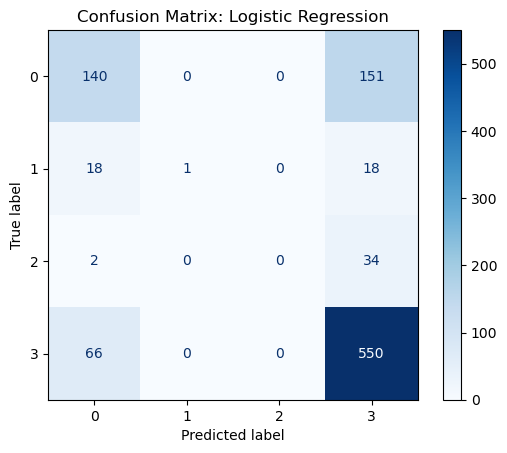

Random Forest is in training section...
Random Forest Accuracy:0.80


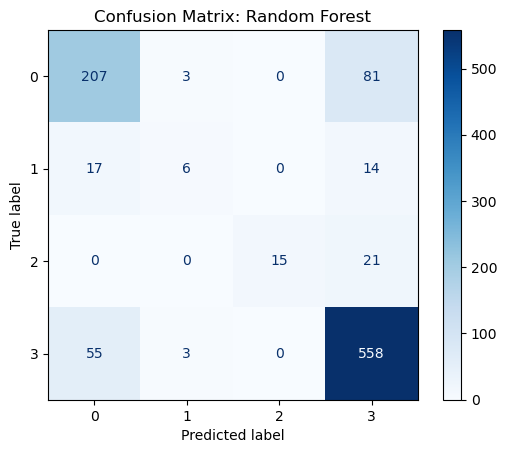

Decision Tree is in training section...
Decision Tree Accuracy:0.73


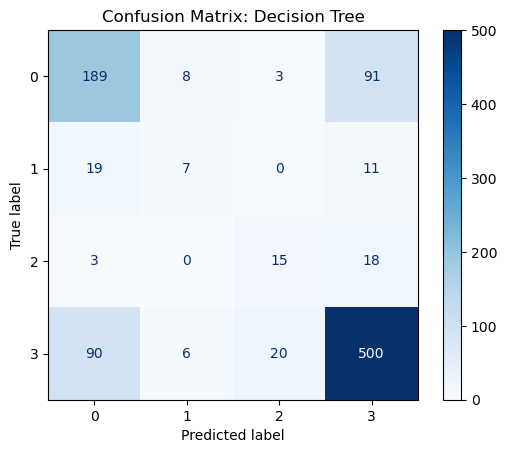

K nearest Neighbors is in training section...
K nearest Neighbors Accuracy:0.71


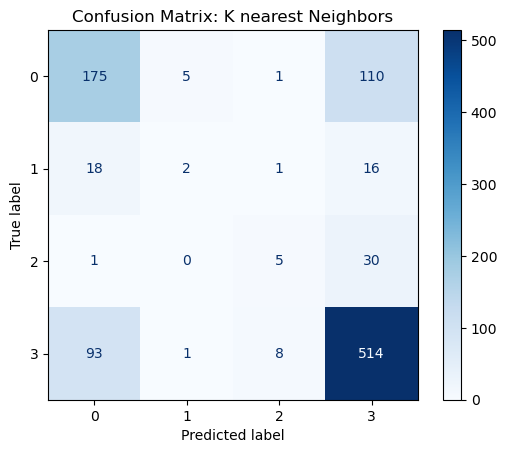

SVM is in training section...
SVM Accuracy:0.72


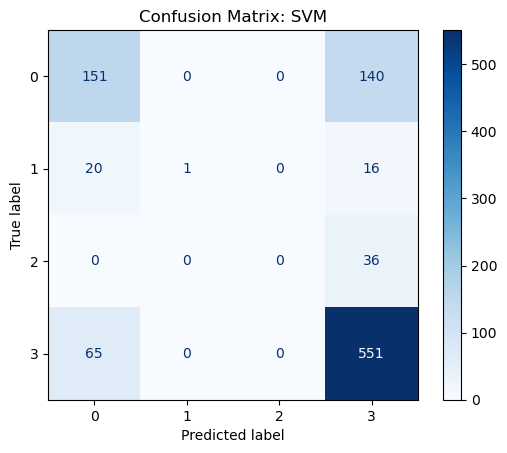

Naive Bayes is in training section...
Naive Bayes Accuracy:0.63


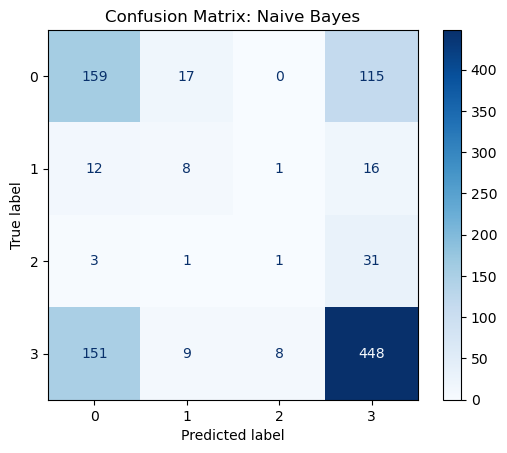

,Model,Accuracy
0,Random Forest,0.802041
1,Decision Tree,0.725510
2,SVM,0.717347
3,K nearest Neighbors,0.710204
4,Logistic Regression,0.705102
5,Naive Bayes,0.628571


In [119]:
# initialize a dictionary to store the models results
results={}
for model_name, model in models.items():
    print(f"{model_name} is in training section...")
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    results[model_name]=accuracy
    print(f'{model_name} Accuracy:{accuracy:.2f}')

    # let add confusion matrix
    cm= confusion_matrix(y_test,y_pred)
    display= ConfusionMatrixDisplay(cm)

    # plot for visual and make the model name title
    display.plot(cmap="Blues")
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Let print the results in a dataframe for better visualization
results_df= pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
results_df= results_df.sort_values(by='Accuracy', ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df

## Hyper Parameter Tunning: Best model selection for Tunning

**Based on the accuracy score from Random Forest (Accuracy: 80%).** 
**I will work on turning the Random Forest**

In [120]:
# let turn Random Forest
rf= RandomForestClassifier()
# display default parameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# let's create a parameter grid for RandomizedSearchCV
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}

# let define RandomsearchCV (we use randomsearch to reduce computational cost)
rf_random= RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=234, n_jobs=-1)
rf_random.fit(X_train,y_train)
# Print best parameters from random search
print(f"Best Parameters from Randomized Search: {rf_random.best_params_}")

# let do cross validation for the best estimator
best_rf= rf_random.best_estimator_
cv_scores= cross_val_score(best_rf,X_train,y_train, cv=5)
print(f"Cross-validation scores for Random Forest: {cv_scores}")
print(f"Mean Cross-validation score: {np.mean(cv_scores):.2f}")




Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters from Randomized Search: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Cross-validation scores for Random Forest: [0.78188776 0.74872449 0.76403061 0.79054917 0.75734355]
Mean Cross-validation score: 0.77


## Predict with Best tuned model

In [122]:
# let use the best model to predict on test set
y_pred_best= best_rf.predict(X_test)
# Display classification report
print("Classification Report for Best Random Forest Model:")
print(classification_report(y_test,y_pred_best))

Classification Report for Best Random Forest Model:
              precision    recall  f1-score   support

     Average       0.75      0.71      0.73       291
         Bad       0.67      0.16      0.26        37
        Best       0.94      0.42      0.58        36
        Good       0.83      0.91      0.87       616

    accuracy                           0.80       980
   macro avg       0.79      0.55      0.61       980
weighted avg       0.80      0.80      0.79       980



## Saving the data

In [123]:
## Saving the data
joblib.dump(best_rf, 'best_model.pkl')

# let save the scaler too
joblib.dump(scale, 'scaler.pkl')
print("=="*30)
print("Best Random Forest model and scaler have been saved successfully.")
print("=="*30)

Best Random Forest model and scaler have been saved successfully.
